In [1]:
%load_ext autoreload
%autoreload 2

## step1 data 

In [2]:
from data.pricevolume import PriceVolume
pv = PriceVolume(path='/home/fbillion/15min/')
pv.build()

/home/fbillion/15min/ticker_names.npy
/home/fbillion/15min/dates.npy
/home/fbillion/15min/OpenPrice.npy
/home/fbillion/15min/ClosePrice.npy
/home/fbillion/15min/HighestPrice.npy
/home/fbillion/15min/LowestPrice.npy
/home/fbillion/15min/Volume.npy
/home/fbillion/15min/Amount.npy
/home/fbillion/15min/VWAP.npy


In [3]:
print(pv.dates[0], pv.dates[-1])

2019-07-01 09:30:00 2019-12-23 14:30:00


## step 2 resample

In [12]:
from data.resample import Resample
rs = Resample(IS_start='2019-08-08', IS_end='2019-12-20', OOS_start='2019-11-01', OOS_end='2019-12-23', IS_OOS_ratio=None)
IS_Data, OOS_Data = rs.build(pv)

['2019-07-01 09:30:00' '2019-07-01 09:45:00' '2019-07-01 10:00:00' ...
 '2019-12-23 14:00:00' '2019-12-23 14:15:00' '2019-12-23 14:30:00']
420 1244 1784
IS start:2019-08-08 09:30:00 end:2019-10-31 14:15:00
OOS start:2019-10-31 14:30:00 end:2019-12-20 14:15:00


## step 3 alpha

In [13]:
from alpha.alpha_101 import Alpha_101
alpha = Alpha_101()
alpha = alpha.build(IS_Data)

In [14]:
alpha

array([[            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       ...,
       [ 3.84172109e-04, -8.73871250e-04, -1.30947185e-03, ...,
        -9.35925126e-03, -2.19578925e-03,  1.31699496e-02],
       [ 5.75926281e-04, -5.82750583e-04, -1.52871806e-03, ...,
        -8.26702490e-03,  1.23545400e-03,  9.65344420e-03],
       [ 1.91828122e-04,  2.58944146e-16, -2.62123198e-03, ...,
        -9.53071584e-03, -2.70776186e-04,  7.53797325e-03]])

## step 4 Deal 

In [21]:
from traders.close_deal import CloseDeal
p=CloseDeal(IS_Data, alpha, 50, 1)
p.build()

## step 5 performace

In [22]:
from evaluators.original_perform import OriginalPerform
op = OriginalPerform(p, cost=0.0001)
op.build()

start:2019-08-13 10:45:00 end:2019-10-31 14:15:00
   Alpha Turnover  Alpha PNL  Net Alpha PNL  Alpha Sharpe  Net Alpha Sharpe  \
            0.535     -0.067         -0.108         -9.22           -14.899   

   Alpha Max Drawdown  Alpha Max DrawdownPeriod  Net Alpha Max Drawdown  \
                0.075                       774                   0.113   

   Net Alpha Max DrawdownPeriod  Alpha Rsquared  
                            774           0.949  


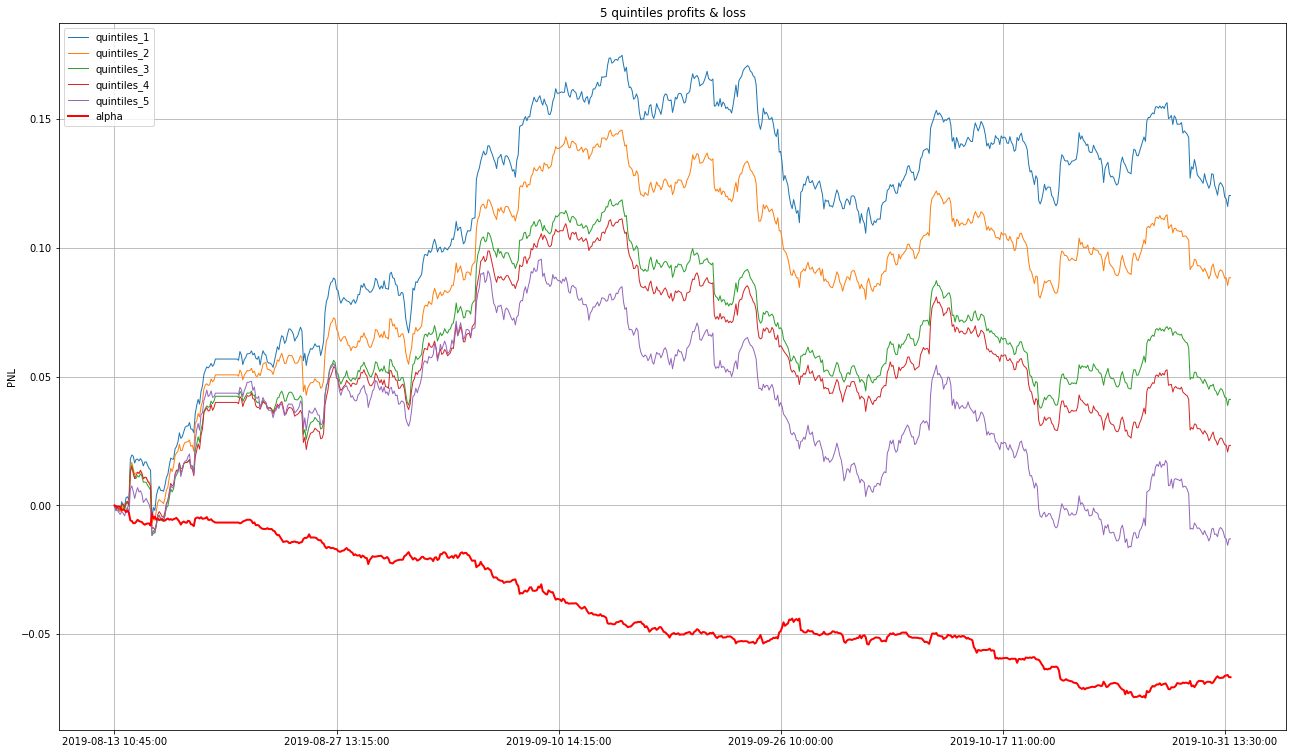

In [23]:
%matplotlib inline
from evaluators.alpha_perform import AlphaPerform
ap = AlphaPerform(p, cost=0.0001, cycle='15MIN', quintiles_num=5)
ap.build()



(775,) (775,)


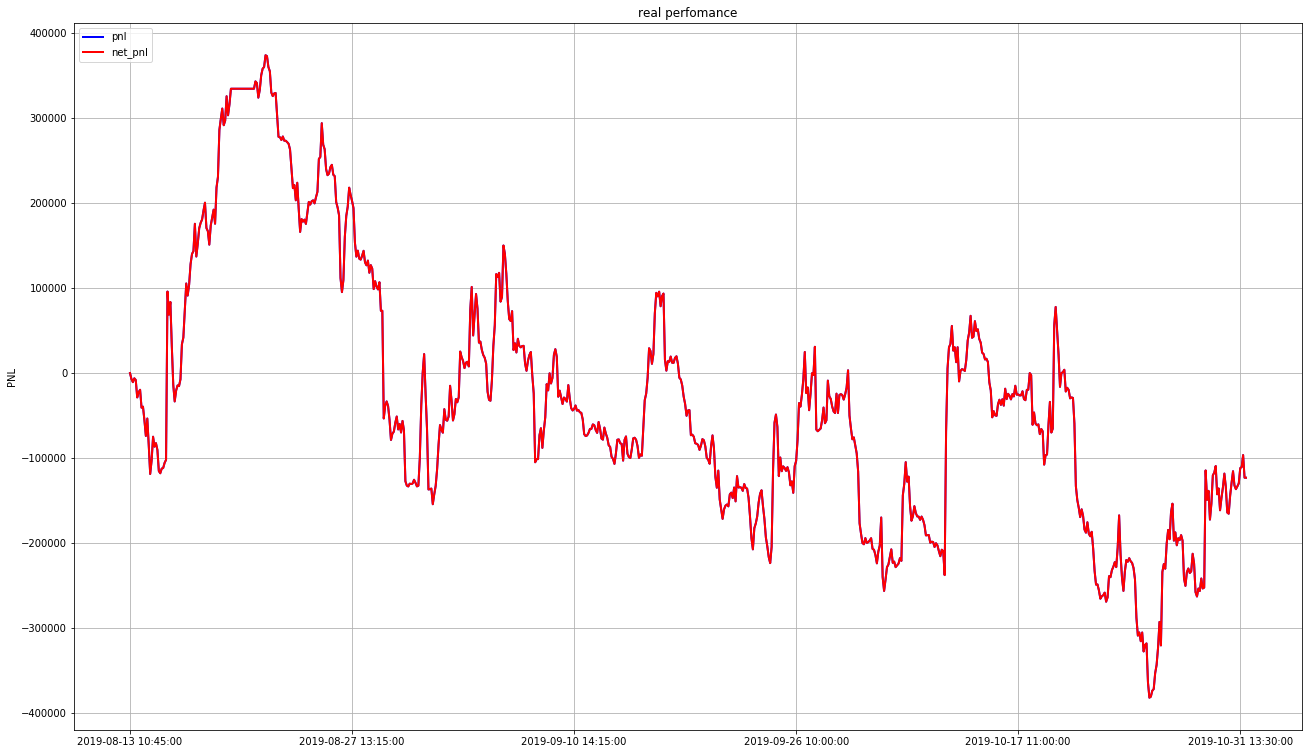

In [24]:
%matplotlib inline
from evaluators.real_perform import RealPerform
ap = RealPerform(p, capital=10e7, cost=0.000)
ap.build()

In [19]:
ap.position[0] * p.resample_tradeprice

array([[ -99294., -443562., -114863., ..., -133431.,  -97734.,  153994.],
       [ -99495., -443562., -114594., ..., -133115.,  -98070.,  152773.],
       [ -99495., -442309., -114863., ..., -132878.,  -98196.,  153180.],
       ...,
       [-105123., -431032., -122933., ..., -150732., -118734.,  262515.],
       [-104319., -429779., -122126., ..., -150100., -118734.,  260850.],
       [-104922., -429779., -123202., ..., -151206., -119350.,  265216.]])

In [20]:
p.resample_tradeprice

array([[ 4.94,  3.54,  4.27, ..., 16.89, 69.81, 41.62],
       [ 4.95,  3.54,  4.26, ..., 16.85, 70.05, 41.29],
       [ 4.95,  3.53,  4.27, ..., 16.82, 70.14, 41.4 ],
       ...,
       [ 5.23,  3.44,  4.57, ..., 19.08, 84.81, 70.95],
       [ 5.19,  3.43,  4.54, ..., 19.  , 84.81, 70.5 ],
       [ 5.22,  3.43,  4.58, ..., 19.14, 85.25, 71.68]])